# Groceries

In [ ]:
!pip install mlxtend --upgrade

In [35]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

In [109]:
def plot_freq(freq):
  fig = plt.figure(figsize=(5,3))
  ax = fig.add_axes([0,0,1.5,1])
  grocery_item = freq.index.tolist()
  item_count = freq.tolist()
  ax.bar(grocery_item,item_count)
  plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='large')
  plt.savefig('plot.png', dpi=300, bbox_inches='tight')
  plt.show()
  

In [138]:
def plot_execution_times(total_execution):
  y = [key for key in total_execution.keys()]
  execution_times =[time for time in total_execution.values()] 
  plt.bar(y,execution_times,color=['orange', 'blue'])
  plt.xlabel('Algorithms')
  plt.ylabel('Time')
  plt.title("Execution Time (seconds) Comparison for bread basket dataset")
  plt.savefig('plot.png', dpi=300, bbox_inches='tight')
  plt.show()

In [37]:
def encoder(all_transactions):
  trans_encoder = TransactionEncoder() # Instanciate the encoder
  trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
  trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)
  return trans_encoder_matrix

In [38]:
def apriori_algo(trans_encoder_matrix):  
  start_time = time.time()
  frequent_itemsets = apriori(trans_encoder_matrix, min_support = 0.001, use_colnames=True)
  total_execution = time.time() - start_time
  frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
  return frequent_itemsets,total_execution

In [52]:
def fpgrowth_algo(trans_encoder_matrix):
  start_time = time.time()
  frequent_itemsets = fpgrowth(trans_encoder_matrix, min_support = 0.001, use_colnames=True)
  total_execution = time.time() - start_time
  frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
  return frequent_itemsets, total_execution

In [124]:
def compute_association_rules(frequent_itemsets,min):
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold= min).iloc[:,:-3]
  rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
  rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
  rules.sort_values("confidence")
  return rules

In [144]:
groceries = pd.read_csv("Groceries_dataset.csv")

In [145]:
groceries.shape
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


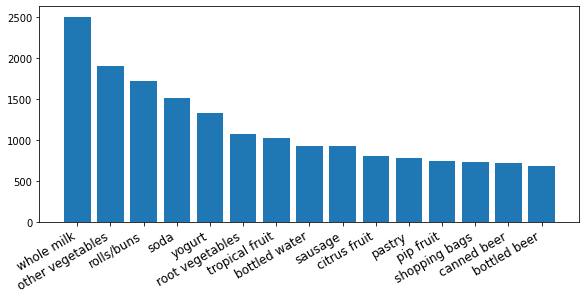

In [146]:
freq = groceries["itemDescription"].value_counts().head(15)
plot_freq(freq)

In [147]:
total_execution= {}

In [148]:
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]
all_transactions[0:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [149]:
trans_encoder_matrix = encoder(all_transactions)
trans_encoder_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [150]:
frequent_itemsets_ap, total_time_ap = apriori_algo(trans_encoder_matrix)
total_execution['apriori'] = total_time_ap

In [151]:
frequent_itemsets_ap

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
...,...,...,...
745,0.001136,"(rolls/buns, sausage, whole milk)",3
746,0.001002,"(rolls/buns, soda, whole milk)",3
747,0.001337,"(rolls/buns, yogurt, whole milk)",3
748,0.001069,"(soda, sausage, whole milk)",3


In [152]:
rules = compute_association_rules(frequent_itemsets_ap,0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
0,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,2,1
1,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,2,1


In [153]:
frequent_itemsets_fp, total_time_fp = fpgrowth_algo(trans_encoder_matrix)
total_execution['fpgrowth'] = total_time_fp

In [154]:
frequent_itemsets_fp

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.009490,(semi-finished bread),1
4,0.051728,(pastry),1
...,...,...,...
745,0.001403,"(yogurt, chewing gum)",2
746,0.001069,"(chewing gum, other vegetables)",2
747,0.001002,"(soda, chewing gum)",2
748,0.001069,"(pasta, whole milk)",2


In [155]:
rules = compute_association_rules(frequent_itemsets_fp, 0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
0,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,2,1
1,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,2,1


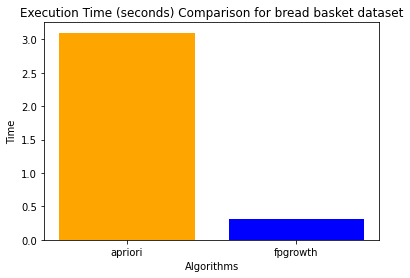

In [156]:
plot_execution_times(total_execution)

In [159]:
support_values = [0.002,0.004,0.008,0.01]
execution_times_apriori = []
for min_support in support_values:
  start_time = time.time()
  frequent_itemsets = apriori(trans_encoder_matrix, min_support, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_apriori.append(end_time)
execution_times_fpgrowth = []
for min_support in support_values:
  start_time = time.time()
  frequent_itemsets = fpgrowth(trans_encoder_matrix, min_support, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_fpgrowth.append(end_time)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


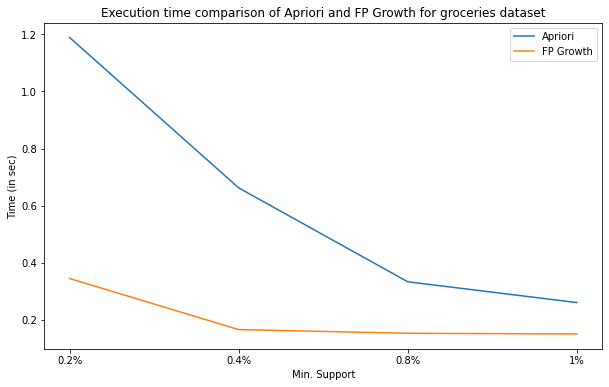

In [160]:
plt.figure(figsize=(10,6))
sns.lineplot(["0.2%","0.4%","0.8%","1%"],execution_times_apriori, label="Apriori")
sns.lineplot(["0.2%","0.4%","0.8%","1%"],execution_times_fpgrowth, label="FP Growth")
plt.title("Execution time comparison of Apriori and FP Growth for groceries dataset")
plt.xlabel("Min. Support")
plt.ylabel("Time (in sec)")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [161]:
transaction_values = [500,3500,7000,10500,14000]
execution_times_apriori = []
for i in transaction_values:
  start_time = time.time()
  frequent_itemsets = apriori(trans_encoder_matrix[0:i], min_support=0.001, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_apriori.append(end_time)
execution_times_fpgrowth = []
for i in transaction_values:
  start_time = time.time()
  frequent_itemsets = fpgrowth(trans_encoder_matrix[0:1], min_support=0.001, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_fpgrowth.append(end_time)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


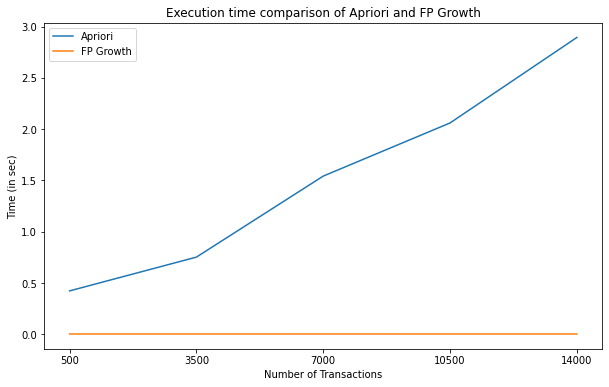

In [163]:
plt.figure(figsize=(10,6))
sns.lineplot(["500","3500","7000","10500","14000"],execution_times_apriori, label="Apriori")
sns.lineplot(["500","3500","7000","10500","14000"],execution_times_fpgrowth, label="FP Growth")
plt.title("Execution time comparison of Apriori and FP Growth")
plt.xlabel("Number of Transactions")
plt.ylabel("Time (in sec)")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Online Retail

In [164]:
retail = pd.read_csv("BreadBasket_DMS.csv")
freq_retail = retail["Item"].value_counts().head(15)
print(freq)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: itemDescription, dtype: int64


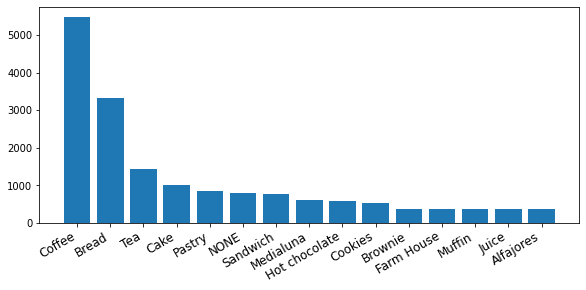

In [165]:
plot_freq(freq_retail)

In [166]:
all_transactions_retail = [transaction[1]['Item'].tolist() for transaction in list(retail.groupby(['Date', 'Time']))]
all_transactions_retail[0:10]


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

In [167]:
trans_encoder_matrix_retail = encoder(all_transactions_retail)
trans_encoder_matrix_retail.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,NONE,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [168]:
total_execution_retail = {}

In [169]:
frequent_itemsets_ap, total_time_ap = apriori_algo(trans_encoder_matrix_retail)
total_execution_retail['apriori'] = total_time_ap

In [170]:
rules = compute_association_rules(frequent_itemsets_ap,0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
0,"(Tartine, NONE)",(Coffee),0.001364,0.475081,0.001259,0.923077,2,1
1,"(Hot chocolate, Medialuna, NONE)",(Coffee),0.001154,0.475081,0.001049,0.909091,3,1


In [171]:
frequent_itemsets_fp, total_time_fp = fpgrowth_algo(trans_encoder_matrix_retail)
total_execution_retail['fpgrowth'] = total_time_fp

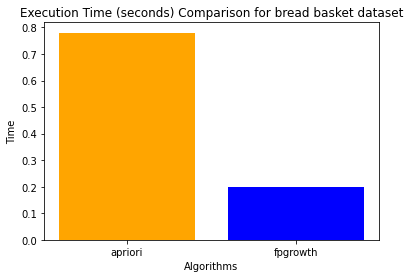

In [172]:
plot_execution_times(total_execution_retail)

In [173]:
support_values = [0.001,0.003,0.005,0.007]
execution_times_apriori = []
for min_support in support_values:
  start_time = time.time()
  frequent_itemsets = apriori(trans_encoder_matrix_retail, min_support, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_apriori.append(end_time)
execution_times_fpgrowth = []
for min_support in support_values:
  start_time = time.time()
  frequent_itemsets = fpgrowth(trans_encoder_matrix_retail, min_support, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_fpgrowth.append(end_time)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


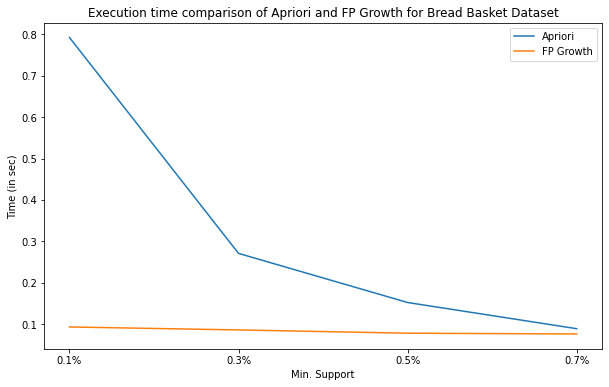

In [174]:
plt.figure(figsize=(10,6))
sns.lineplot(["0.1%","0.3%","0.5%","0.7%"],execution_times_apriori, label="Apriori")
sns.lineplot(["0.1%","0.3%","0.5%","0.7%"],execution_times_fpgrowth, label="FP Growth")
plt.title("Execution time comparison of Apriori and FP Growth for Bread Basket Dataset")
plt.xlabel("Min. Support")
plt.ylabel("Time (in sec)")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [175]:
transaction_values = [500,2000,4000,6000,9530]
execution_times_apriori = []
for i in transaction_values:
  start_time = time.time()
  frequent_itemsets = apriori(trans_encoder_matrix_retail[0:i], min_support=0.001, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_apriori.append(end_time)
execution_times_fpgrowth = []
for i in transaction_values:
  start_time = time.time()
  frequent_itemsets = fpgrowth(trans_encoder_matrix_retail[0:1], min_support=0.001, use_colnames=True)
  end_time = time.time() - start_time
  execution_times_fpgrowth.append(end_time)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


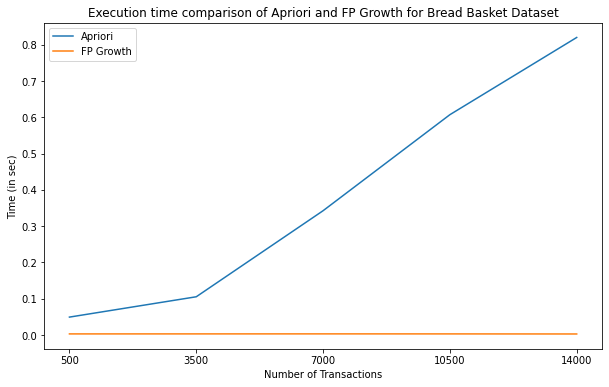

In [176]:
plt.figure(figsize=(10,6))
sns.lineplot(["500","3500","7000","10500","14000"],execution_times_apriori, label="Apriori")
sns.lineplot(["500","3500","7000","10500","14000"],execution_times_fpgrowth, label="FP Growth")
plt.title("Execution time comparison of Apriori and FP Growth for Bread Basket Dataset")
plt.xlabel("Number of Transactions")
plt.ylabel("Time (in sec)")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()